# EDA of NBA Active Players Data

#### Questions:
- What is the current player age distribution?
- At what age do players tend to "peak" statistically?
    - This can be broken down into pts, rbs, fg%, etc
    - Over time (both age and experience), how does performance change?
- What position performs the best? Do certain positions score/rebound/assist more than others?


#### Be Careful:
- If a player is in the NBA for a long time, they have performed well (and vice versa).
- Not every season has the same number of games played... (e.g. COVID year)

#### More Data?
- Height, weight, wingspan
- Right vs. Left shooter
- Draft info
- Salary
- Num injuries

In [58]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv('nba.csv').drop(columns = ['Unnamed: 0'])

## Cleaning

In [60]:
# convert numerical fields to correct datatype
numeric_cols = [col for col in df.columns if col not in ['Name', 'Season', 'Tm', 'Lg', 'Pos']]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [61]:
# remove any obs of DID NOT PLAY
discard = ['Did Not Play']
df = df[df['Pos'].str.contains('|'.join(discard))==False]

In [62]:
# remove stats from current season
df = df[df['Season'].str.contains('2022-23')==False]

## Exploring

In [72]:
df.head(10)

,Name,Exp,Season,Age,Tm,Lg,Pos,G,GS,MP,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Álex Abrines,1,2016-17,23.0,OKC,NBA,SG,5.0,0.0,16.0,...,0.750,0.4,1.4,1.8,0.8,0.0,0.0,0.0,1.6,4.8
1,Álex Abrines,2,2017-18,24.0,OKC,NBA,SG,6.0,0.0,18.3,...,1.000,0.5,2.2,2.7,0.3,0.8,0.3,0.2,1.8,4.0
2,Precious Achiuwa,1,2020-21,21.0,MIA,NBA,PF,61.0,4.0,12.1,...,0.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0
3,Precious Achiuwa,2,2021-22,22.0,TOR,NBA,C,73.0,28.0,23.6,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
5,Quincy Acy,1,2012-13,22.0,TOR,NBA,PF,29.0,0.0,342.0,...,0.816,30.0,47.0,77.0,11.0,13.0,15.0,17.0,53.0,116.0
6,Quincy Acy,2,2013-14,23.0,TOT,NBA,SF,63.0,0.0,847.0,...,0.660,72.0,144.0,216.0,28.0,23.0,26.0,30.0,122.0,171.0
7,Quincy Acy,3,2013-14,23.0,TOR,NBA,SF,7.0,0.0,61.0,...,0.625,5.0,10.0,15.0,4.0,4.0,3.0,2.0,8.0,19.0
8,Quincy Acy,4,2013-14,23.0,SAC,NBA,SF,56.0,0.0,786.0,...,0.667,67.0,134.0,201.0,24.0,19.0,23.0,28.0,114.0,152.0
9,Quincy Acy,5,2014-15,24.0,NYK,NBA,PF,68.0,22.0,1287.0,...,0.784,79.0,222.0,301.0,68.0,27.0,22.0,60.0,147.0,398.0
10,Quincy Acy,6,2015-16,25.0,SAC,NBA,PF,59.0,29.0,876.0,...,0.735,65.0,123.0,188.0,27.0,29.0,24.0,27.0,103.0,307.0


In [64]:
sns.set_style('darkgrid')

<AxesSubplot:xlabel='Age'>

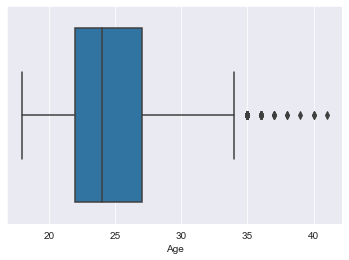

In [65]:
# age distribution
sns.boxplot(data=df, x='Age')

<AxesSubplot:xlabel='Exp'>

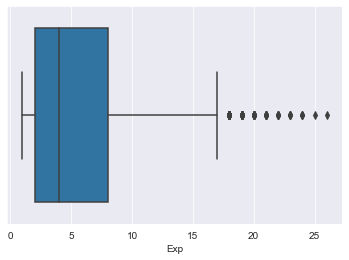

In [66]:
# experience distribution
sns.boxplot(data=df, x='Exp')

In [71]:
df['MP'].max()

2069.0

In [67]:
# reduce df to players with 10+ yrs experience
experienced_players = df[df['Exp'] >= 5]['Name'].unique()
ten = df[df['Name'].isin(experienced_players)]

# reduce df to seasons where player played at least 40 games
ten = ten[ten['G'] >= 40]

In [68]:
age = ten.groupby('Age')
age.mean()

age_df = age.mean().reset_index()

In [69]:
exp = ten.groupby('Exp')
exp.mean()

exp_df = exp.mean().reset_index()

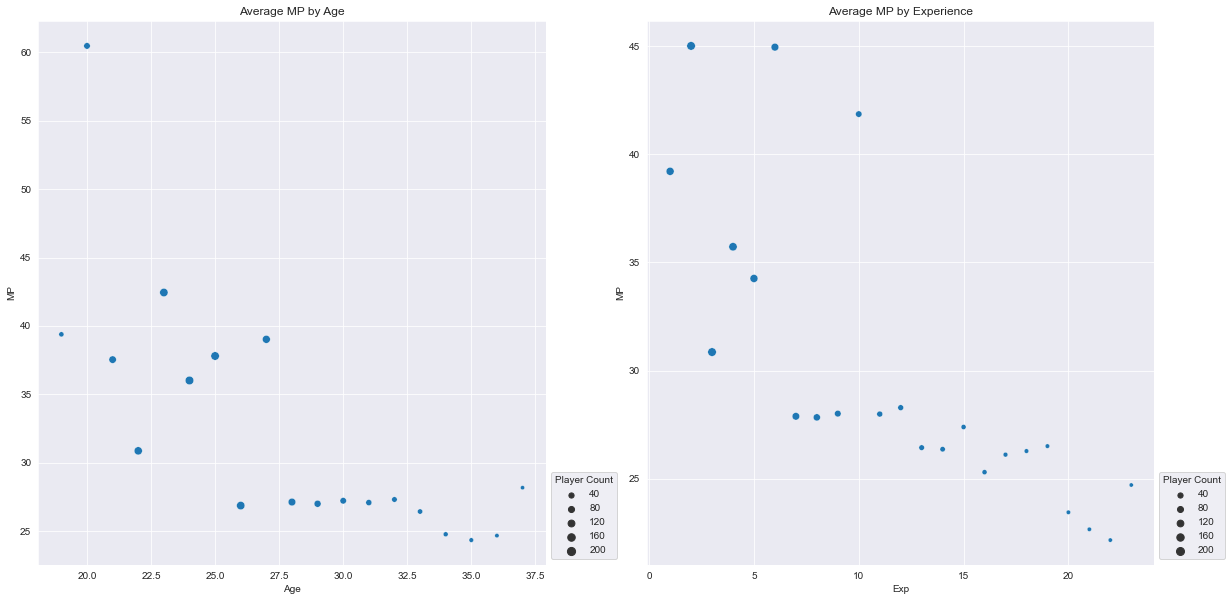

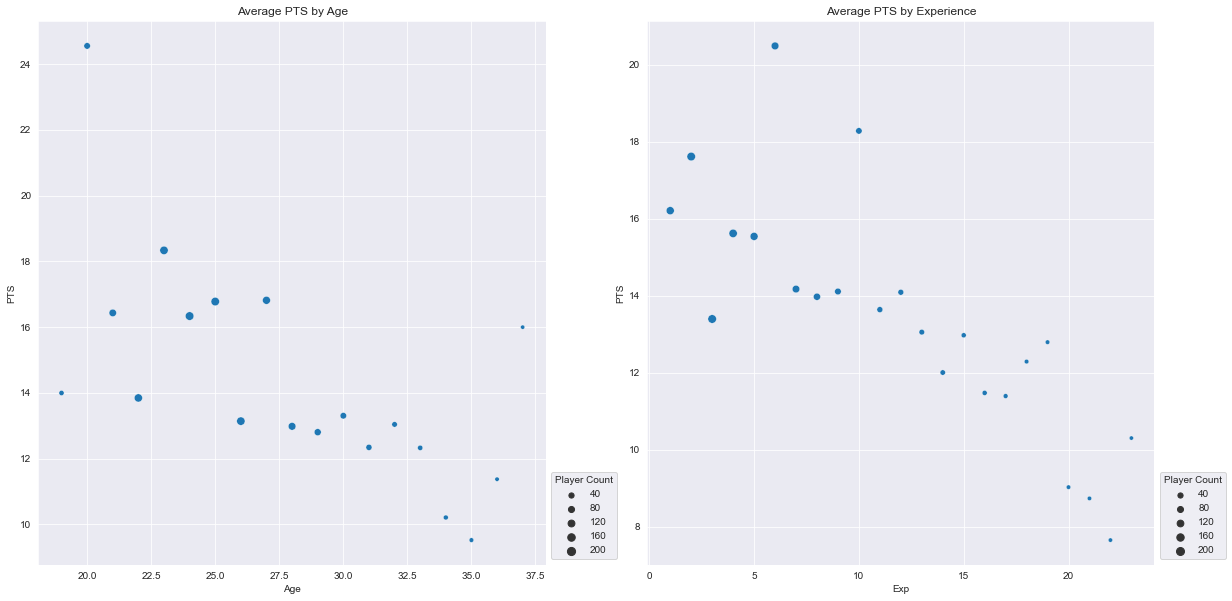

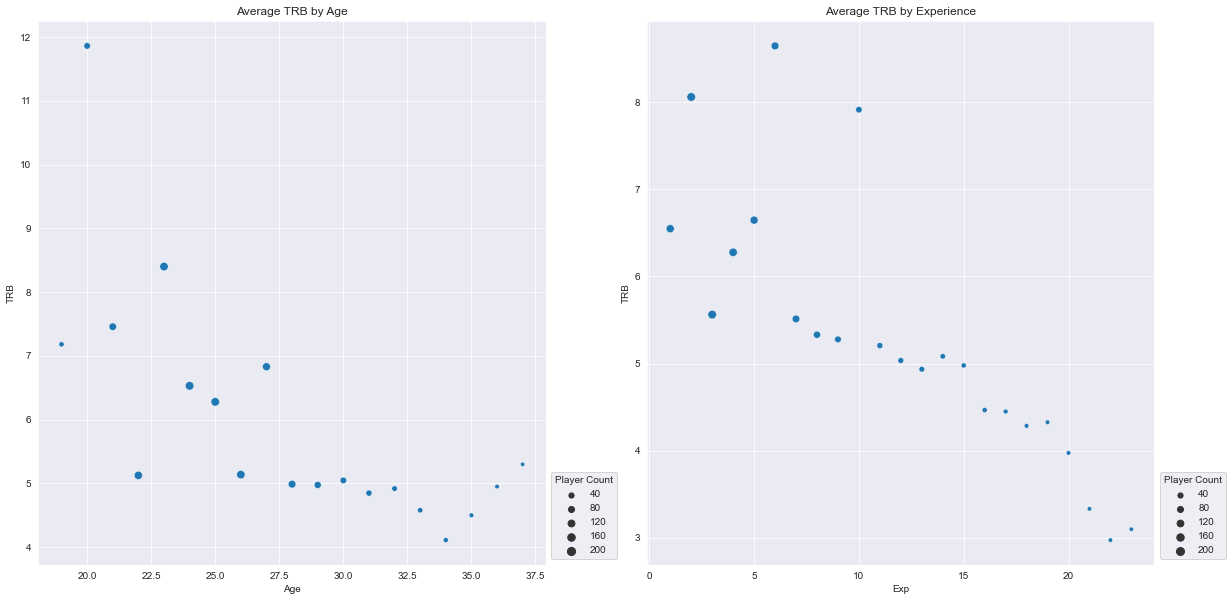

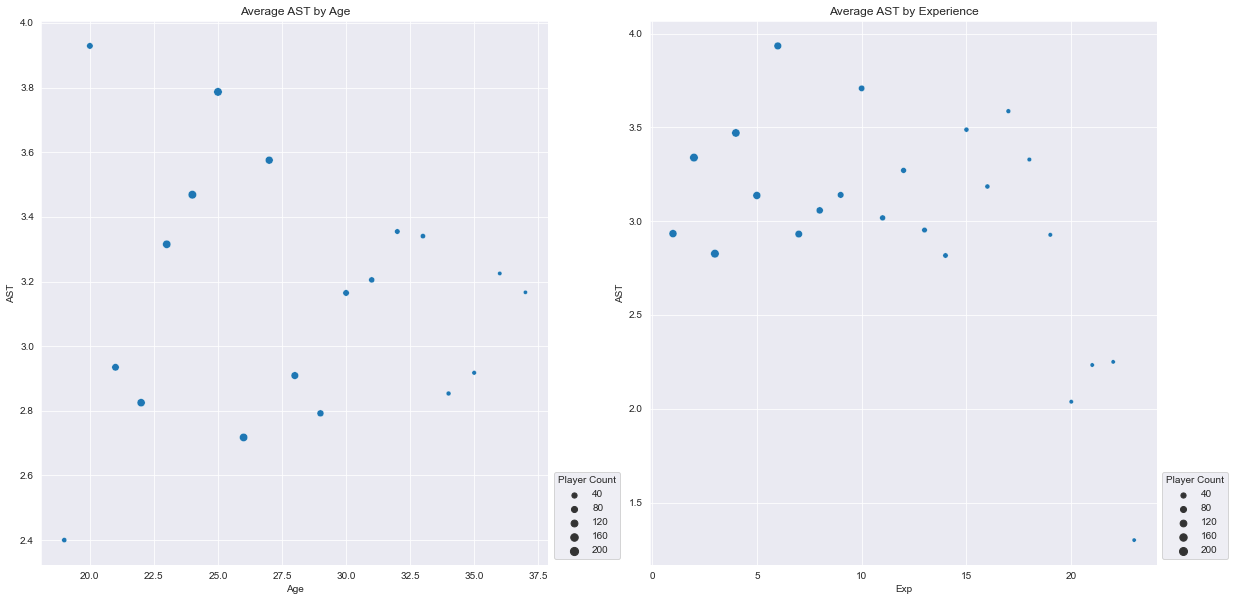

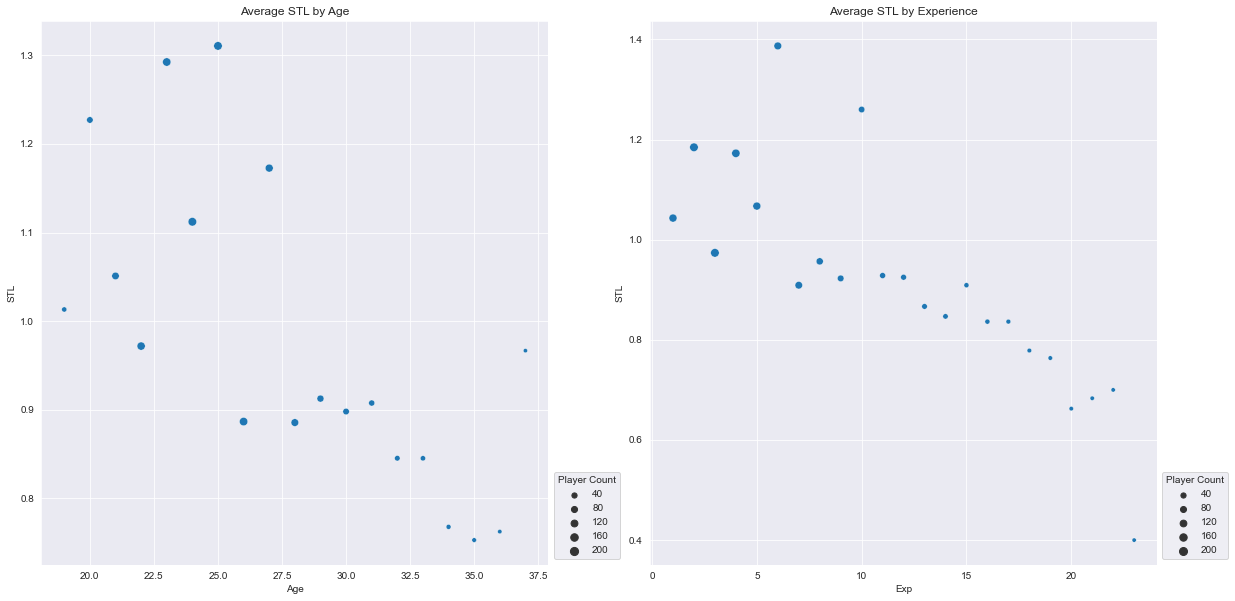

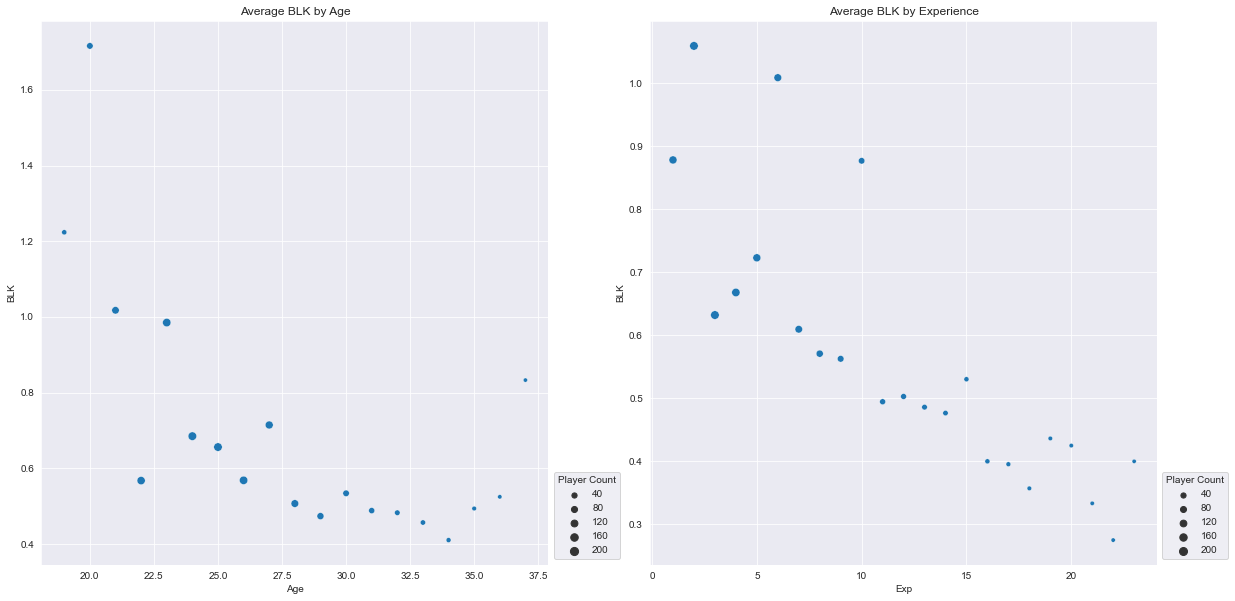

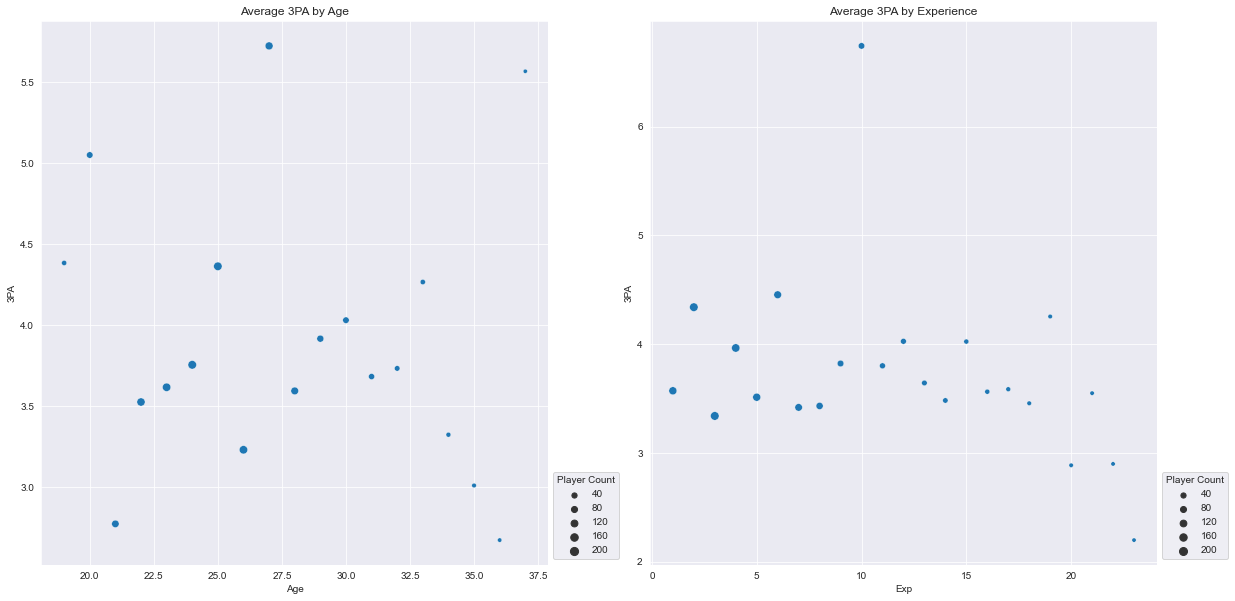

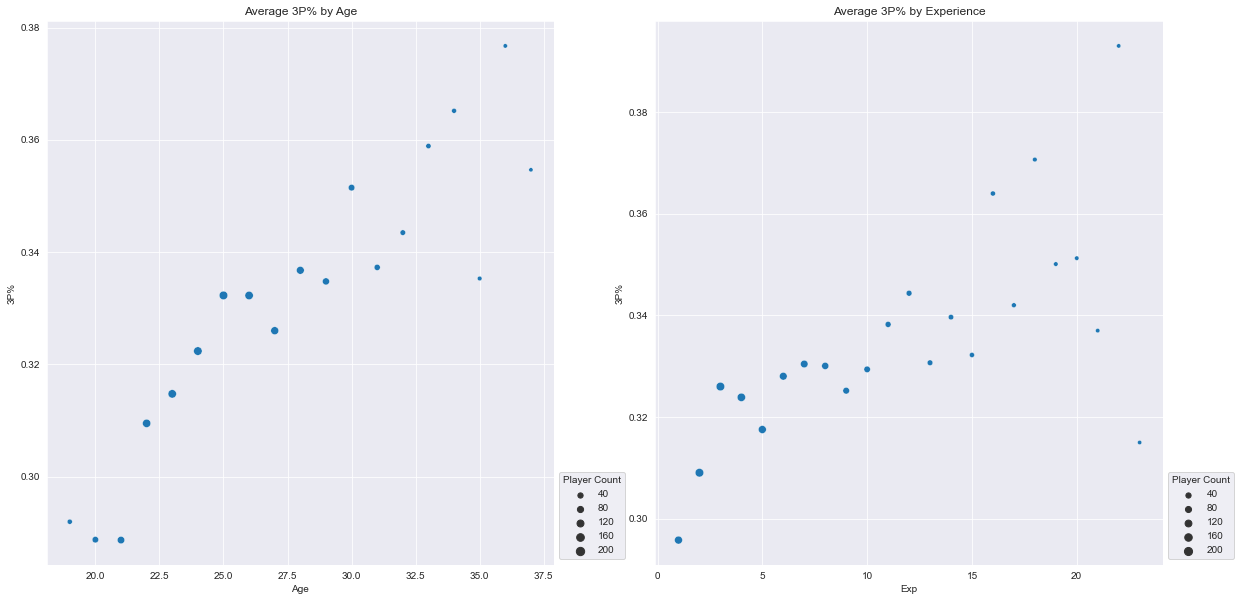

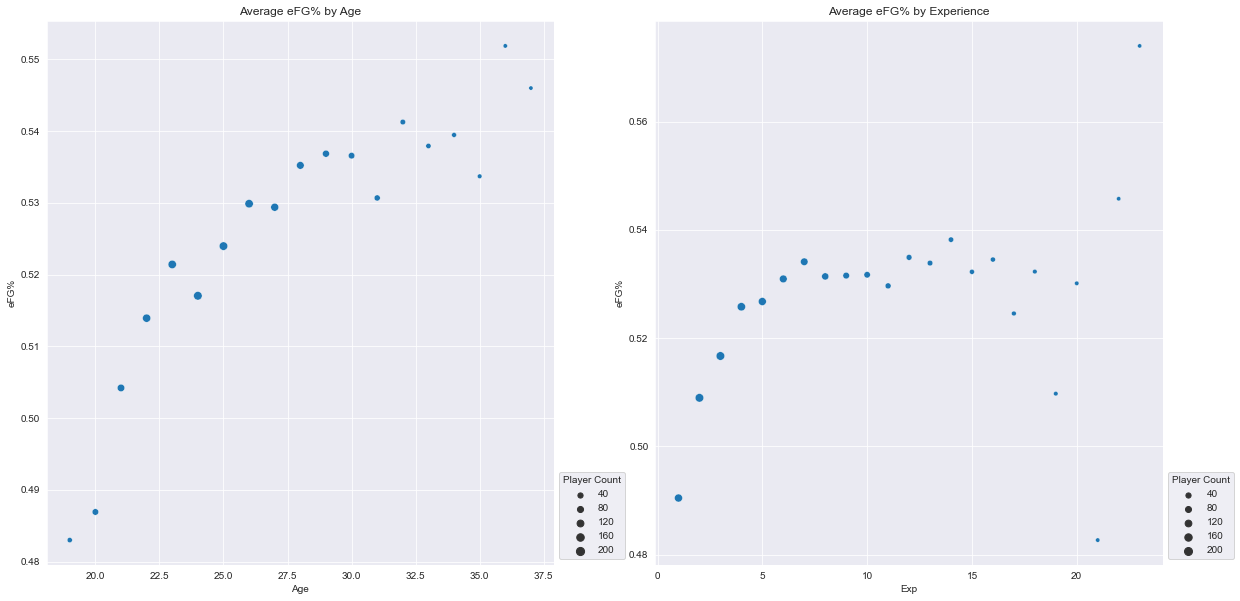

In [70]:
columns_of_interest = ['MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK', '3PA', '3P%', 'eFG%']

for col in columns_of_interest:
    fig, axes = plt.subplots(1,2)

    fig.set_figheight(10)
    fig.set_figwidth(20)

    temp_df = age.describe()[col][['count', 'mean']]
    temp_df2 = exp.describe()[col][['count', 'mean']]
    sns.scatterplot(ax=axes[0], data=temp_df, x='Age', y='mean', size='count')
    sns.scatterplot(ax=axes[1], data=temp_df2, x='Exp', y='mean', size='count')

    axes[0].set_ylabel(col)
    axes[1].set_ylabel(col)
    
    axes[0].set_title('Average ' + col + ' by Age')
    axes[1].set_title('Average ' + col + ' by Experience')

    axes[0].legend(title='Player Count', loc=(1.01,0.01))
    axes[1].legend(title='Player Count', loc=(1.01,0.01))

    plt.show()

In [46]:
exp.count()[columns_of_interest]

,MP,PTS,TRB,AST,STL,BLK,3PA,3P%,eFG%
Exp,,,,,,,,,
1,135,135,135,135,135,135,135,124,135
2,135,135,135,135,135,135,135,129,135
3,138,138,138,138,138,138,138,130,138
4,140,140,140,140,140,140,140,130,140
5,139,139,139,139,139,139,139,131,139
6,145,145,145,145,145,145,145,135,145
7,142,142,142,142,142,142,142,137,142
8,138,138,138,138,138,138,138,132,138
9,136,136,136,136,136,136,136,132,136


In [ ]:
sns.lineplot(data=df, x='Age', y='3P%', size='')

In [67]:
df.Pos.value_counts()
# very few are listed in multiple positions
# reduce to PG, SG, SF, PF, C
valid_pos = ['PG', 'SG', 'SF', 'PF', 'C']
pos = df[df['Pos'].isin(valid_pos)].groupby('Pos')
pos.mean().reset_index()

# make new pos df
pos_df = pos.mean().reset_index()
pos_df

,Pos,Exp,Age,G,GS,MP,FG,FGA,FG%,3P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,C,6.128834,25.414724,42.931288,24.401227,30.923190,5.780000,10.959387,0.528705,0.411534,...,0.680315,2.801227,6.126626,8.927730,1.788466,0.767362,1.320245,1.913988,3.498896,14.452761
1,PF,5.616162,25.122334,39.555556,21.544332,41.404489,6.530303,13.840292,0.459595,1.480584,...,0.722631,2.462402,6.889113,9.348036,2.640404,1.082492,1.015152,2.138159,4.067116,17.448260
2,PG,5.868335,25.341676,42.007617,23.239391,39.046246,5.832318,14.055495,0.410171,1.723069,...,0.790123,0.779761,3.634603,4.411317,6.344070,1.460065,0.317519,2.775626,3.194233,16.046137
3,SF,5.467136,25.076291,42.070423,23.514085,28.009390,4.073474,9.280634,0.425448,1.226878,...,0.756466,1.105869,3.706690,4.810915,1.945540,0.898357,0.479460,1.330282,2.333568,11.273826
4,SG,4.918738,24.704589,40.606119,20.347036,36.183078,5.656023,13.441205,0.414313,1.973040,...,0.777283,0.762333,3.739197,4.499140,3.122945,1.047992,0.330019,1.874474,2.705163,15.619407


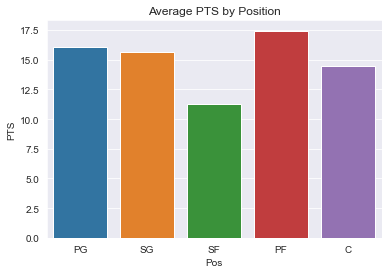

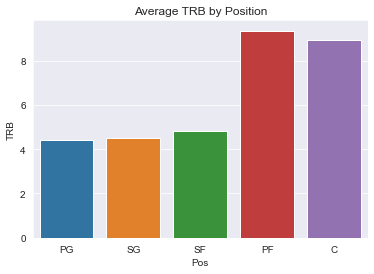

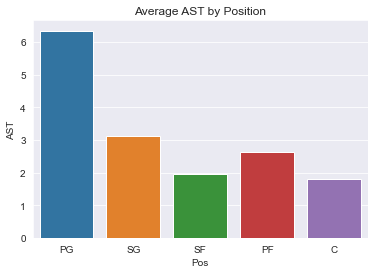

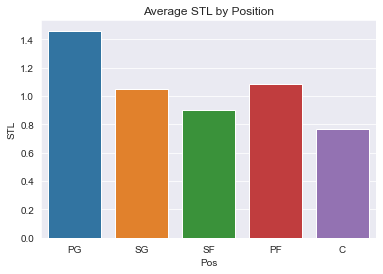

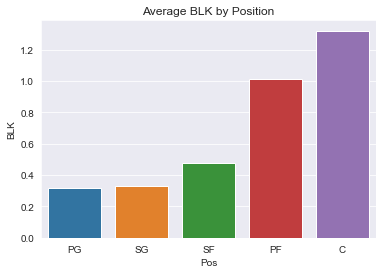

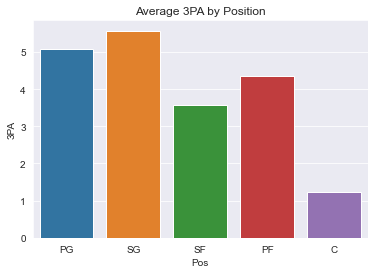

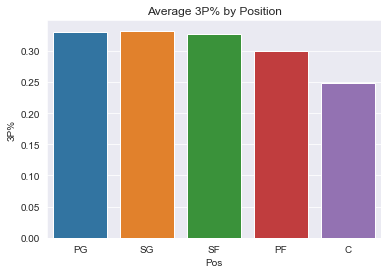

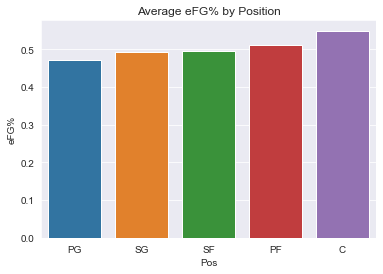

In [76]:
columns_of_interest = ['PTS', 'TRB', 'AST', 'STL', 'BLK', '3PA', '3P%', 'eFG%']

for col in columns_of_interest:
    sns.barplot(data=pos_df, x='Pos', y=col, order=valid_pos)
    plt.title('Average ' + col + ' by Position')
    plt.show()

In [73]:
dfs = pd.read_html('https://www.basketball-reference.com/players/a/achiupr01.html')

In [80]:
dfs[0]

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2020-21,21.0,MIA,NBA,PF,61.0,4.0,12.1,2.0,3.7,...,0.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0
1,2021-22,22.0,TOR,NBA,C,73.0,28.0,23.6,3.6,8.3,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
2,2022-23,23.0,TOR,NBA,C,12.0,0.0,20.4,3.0,7.7,...,0.848,2.0,5.0,7.0,1.3,0.2,0.6,1.3,1.6,8.8
3,Career,NaN,NaN,NBA,NaN,146.0,32.0,18.5,2.9,6.3,...,0.591,1.7,3.6,5.2,0.9,0.4,0.5,1.0,1.8,7.3
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2 seasons,NaN,TOR,NBA,NaN,85.0,28.0,23.2,3.5,8.2,...,0.646,2.0,4.6,6.6,1.2,0.5,0.6,1.2,2.0,9.0
6,1 season,NaN,MIA,NBA,NaN,61.0,4.0,12.1,2.0,3.7,...,0.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0
